*Model Development*

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Data//automobileEDA1.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

1. Linear Regression

In [7]:
# 'highway-mpg' vs 'price'

X = df[['highway-mpg']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [13]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
lm.intercept_

38423.3058581574

In [15]:
lm.coef_

array([-821.73337832])

In [17]:
# 'engine-size' vs 'price'

lm1 = LinearRegression()
X1 = df[['engine-size']]
Y1 = df['price']
lm1.fit(X1, Y1)

LinearRegression()

In [18]:
Yhat1 = lm1.predict(X1)
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [19]:
lm1.intercept_

-7963.338906281024

In [20]:
lm1.coef_

array([166.86001569])

(0.0, 48174.4568694263)

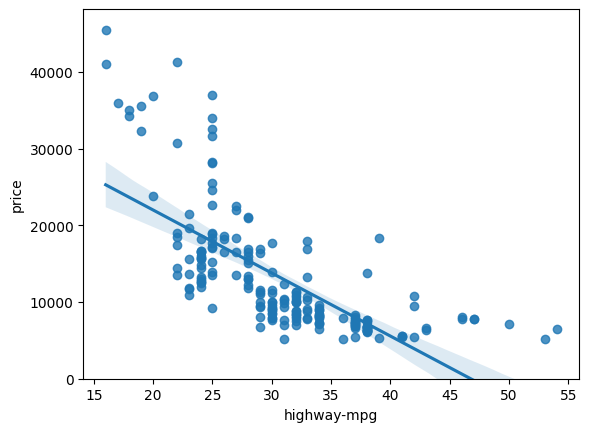

In [31]:
# visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

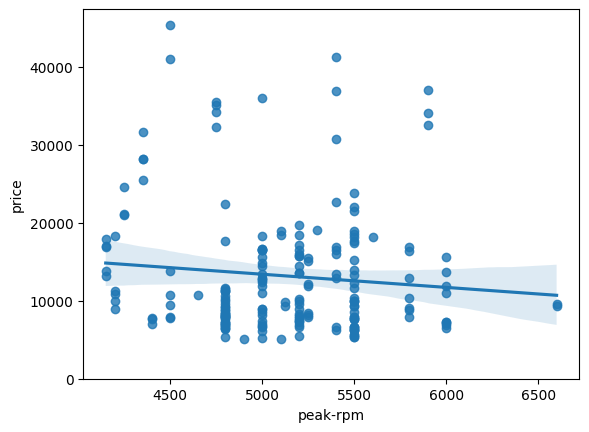

In [32]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [35]:
# Verify the correlation by calculating corr()

df[['highway-mpg', 'peak-rpm', 'price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


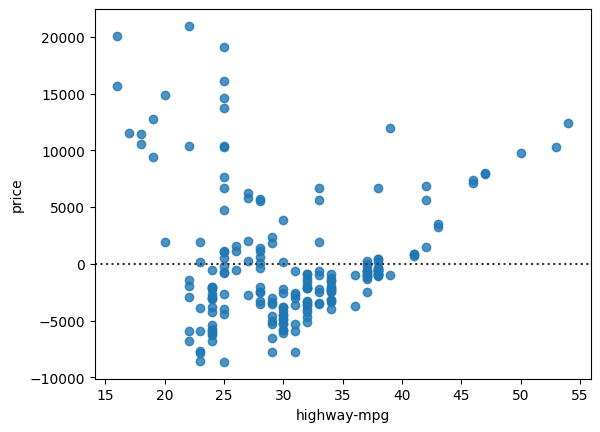

In [36]:
# Residual plot

sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

2. Multiple Linear Regression

In [21]:
lm2 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2.fit(Z, df['price'])

LinearRegression()

In [22]:
lm2.intercept_

-15806.62462632923

In [23]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [37]:
Yhat2 = lm2.predict(Z)
Yhat2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

C:\Users\chris\AppData\Local\Temp\ipykernel_12504\3655619922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\chris\AppData\Local\Temp\ipykernel_12504\3655619922.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

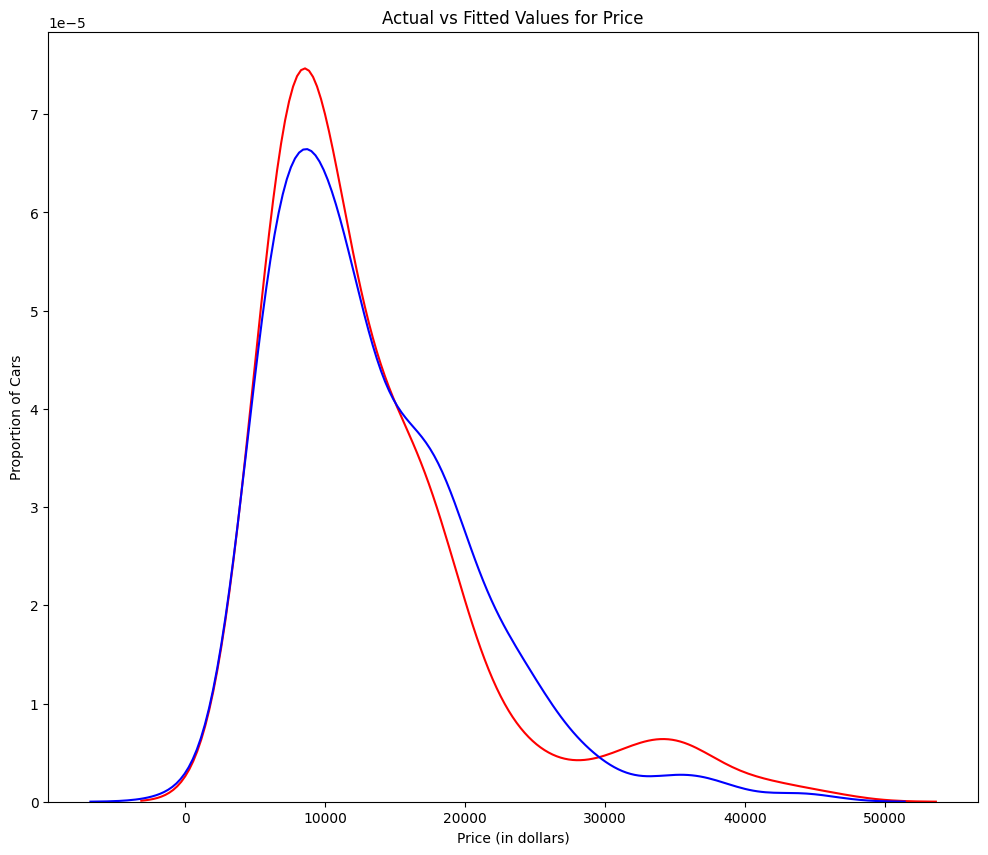

In [40]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

3. Polynomial Regression and Pipelines

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pr=PolynomialFeatures(degree=2)

Z_pr=pr.fit_transform(Z)
Z.shape

(201, 4)

In [49]:
Z_pr.shape

(201, 15)

In [51]:
# create pipeline

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [52]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [57]:
Z = Z.astype(float)
pipe.fit(Z,df['price'])
y_pipe = pipe.predict(Z)
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

4. Measures for In-Sample Evaluation

In [64]:
# MODEL 1 Simple Linear Regression - Highway-mpg

# Calculate R2

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [59]:
# Calculate MSE

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [65]:
# MODEL 2 - Multiple Linear Regression

# fit the model 
lm2.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm2.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [62]:
Y_predict_multifit = lm2.predict(Z)

In [63]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [70]:
# MODEL 3 - Polynomial Fit

from sklearn.metrics import r2_score

r_squared = r2_score(df['price'], y_pipe)
print('The R-square value is: ', r_squared)

The R-square value is:  0.8463341969864728


In [71]:
mean_squared_error(df['price'], y_pipe)

9656613.4039896

5. prediction using MODEL 1

In [77]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)
new_input = new_input.astype(float)

In [73]:
lm.fit(X, Y)
lm

LinearRegression()

In [78]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

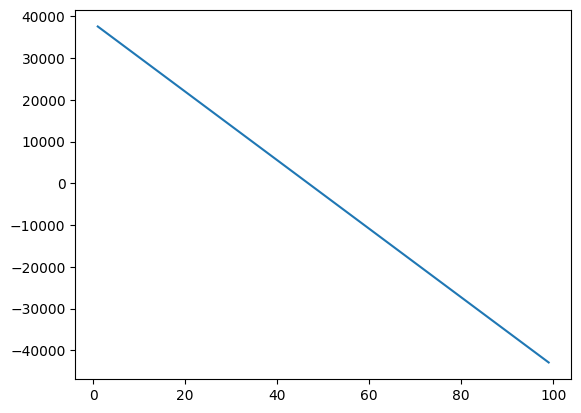

In [79]:
plt.plot(new_input, yhat)
plt.show()